## Kaggle Study - 산탄데르 제품 추천 경진대회

In [1]:
# load data
import pandas as pd
import numpy as np

trn = pd.read_csv('data/train_ver2.csv')
tst = pd.read_csv('data/test_Ver2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# train, test data의 크기를 확인
print("train : ", trn.shape)
print("test : ", tst.shape)

train :  (13647309, 48)
test :  (929615, 24)


In [3]:
print('number of rows = ', len(trn['ncodpers']), ' number of custoemr', len(np.unique(trn['ncodpers'].astype(str))))

# 95만명의 고객 데이터, 1364만건의 데이터

number of rows =  13647309  number of custoemr 956645


* 훈련 데이터가 어떻게 생겼는지를 확인해보자

In [4]:
trn.head()

# trn.head().pd.to_csv("trn_head.csv", mode="w")

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


* 구글시트에서 확인 -> https://docs.google.com/spreadsheets/d/1XF2OGFg3XZC2Z3jUdi-rlNQ8_SO0myPMfc-TKfmTjok/edit?usp=sharing

In [5]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

* float64 데이터를 int로 바꾸면 메모리를 아낄 수 있다.
* float64 데이터들의 unique value를 살펴보고 바꿀 수 있는 변수는 다 바꾸자

In [6]:
# float64 변수들의 unique value

float_cols = [col for col in trn.columns if trn[col].dtype in ['float64']]

for col in float_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# columns name : {}, n_uniq : {}, \nuniq : {}'.format(col, len(uniq), uniq))
# tipodom은 모든 변수가 1 또는 nan인 칼럼으로 큰 의미가 없어보임

--------------------------------------------------
# columns name : ind_nuevo, n_uniq : 3, 
uniq : ['0.0' '1.0' 'nan']
--------------------------------------------------
# columns name : indrel, n_uniq : 3, 
uniq : ['1.0' '99.0' 'nan']
--------------------------------------------------
# columns name : tipodom, n_uniq : 2, 
uniq : ['1.0' 'nan']
--------------------------------------------------
# columns name : cod_prov, n_uniq : 53, 
uniq : ['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0'
 '19.0' '2.0' '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0'
 '28.0' '29.0' '3.0' '30.0' '31.0' '32.0' '33.0' '34.0' '35.0' '36.0'
 '37.0' '38.0' '39.0' '4.0' '40.0' '41.0' '42.0' '43.0' '44.0' '45.0'
 '46.0' '47.0' '48.0' '49.0' '5.0' '50.0' '51.0' '52.0' '6.0' '7.0' '8.0'
 '9.0' 'nan']
--------------------------------------------------
# columns name : ind_actividad_cliente, n_uniq : 3, 
uniq : ['0.0' '1.0' 'nan']
--------------------------------------------------
# co

* 일단 금융상품 칼럼의 값이 nan인것을 먼저 0으로 처리하고 int형으로 변환해보자
* 바꾸는 김에 모든 금융상품의 type을 int64에서 int8로 변경

In [2]:
product = trn.columns.tolist()[24:] # product의 name을 리스트로 저장

In [3]:
# product의 nan을 0으로 대체하고 int형으로 변환 
trn[product] = trn[product].fillna(0).astype(np.int8)

trn.info()

### 메모리가 상당히 많이 줄어들었다. (4.9GB -> 2.7GB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int8
ind_aval_fin_ult1        int8
ind_cco_fin_ult1         int8
ind_cder_fin_ult1     

* NULL 데이터나 잘못 입력된 데이터 등을 줄이면 메모리를 더 아낄 수 있고 분석이 용이해질것으로 보임

In [9]:
# NULL 데이터가 얼마나 있는지 살펴보자
trn.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

* null값에 대한 처리는 baseline모델에서 다시 치루고 EDA에서는 일단 무시
* 머신러닝 모델 학습을 위해서는 훈련 데이터의 타입이 모두 int 혹은 float이어야 한다. (45page)
* int, float으로 변환하거나 혹은 적절히 dummy화


* 수치형으로 되어있는 데이터의 요약통계값을 확인해보자

In [10]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64', 'int8']]
# 위 코드는 리스트 표현식의 일종 (참고 : https://dojang.io/mod/page/view.php?id=982)

print(len(num_cols))
# 7개의 데이터가 수치형으로 되어 있음

trn[num_cols].describe()

7


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


* 범주형으로 되어있는 데이터의 요약값

In [11]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
# O가 아니라 object를 넣어도 됨

print(len(cat_cols))
# 17개의 데이터가 범주형으로 되어 있음

trn[cat_cols].describe()

# age가 category데이터로 되어있으며 unique value가 235개나 되는데...

17


,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


* age 데이터는 수치형임에도 불구하고 category로 분류되어 있고 unique value가 235개 존재
* age 데이터의 unique value를 살펴보고 전처리를 통해 int형으로 변환해보자

In [12]:
np.unique(trn['age'].astype(str))

array(['  2', '  3', '  4', '  5', '  6', '  7', '  8', '  9', ' 10',
       ' 11', ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19',
       ' 20', ' 21', ' 22', ' 23', ' 24', ' 25', ' 26', ' 27', ' 28',
       ' 29', ' 30', ' 31', ' 32', ' 33', ' 34', ' 35', ' 36', ' 37',
       ' 38', ' 39', ' 40', ' 41', ' 42', ' 43', ' 44', ' 45', ' 46',
       ' 47', ' 48', ' 49', ' 50', ' 51', ' 52', ' 53', ' 54', ' 55',
       ' 56', ' 57', ' 58', ' 59', ' 60', ' 61', ' 62', ' 63', ' 64',
       ' 65', ' 66', ' 67', ' 68', ' 69', ' 70', ' 71', ' 72', ' 73',
       ' 74', ' 75', ' 76', ' 77', ' 78', ' 79', ' 80', ' 81', ' 82',
       ' 83', ' 84', ' 85', ' 86', ' 87', ' 88', ' 89', ' 90', ' 91',
       ' 92', ' 93', ' 94', ' 95', ' 96', ' 97', ' 98', ' 99', ' NA',
       '10', '100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '11', '110', '111', '112', '113', '114', '115',
       '116', '117', '12', '126', '127', '13', '14', '15', '16', '163',
       '164', '17', 

In [4]:
# NA값은 -99로 대체하고, 정수형으로 변환하자
# 책에서 na등 특이값을 -99로 대체하는게 그 이유는 다시 알아보자

trn['age'].replace(' NA', -99, inplace=True)
trn['age'] = trn['age'].astype(np.int8)

In [14]:
trn['age'].describe()

count    1.364731e+07
mean     3.989841e+01
std      1.827609e+01
min     -9.900000e+01
25%      2.400000e+01
50%      3.900000e+01
75%      5.000000e+01
max      1.270000e+02
Name: age, dtype: float64

In [15]:
# 수정된 dataFrame의 info
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      int8
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int8
ind_aval_fin_ult1        int8
ind_cco_fin_ult1         int8
ind_cder_fin_ult1       

* 이번엔 예측변수가 될 product들이 어떻게 생겼는지 보자 (직접적인 예측변수는 아니지만)

In [16]:
# product = trn.columns.tolist()[24:] # product의 name을 리스트로 저장

for col in product:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# product name : {}, n_uniq : {}, uniq : {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# product name : ind_ahor_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_aval_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cco_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cder_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cno_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctju_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctma_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctop_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ct

* product 칼럼은 보유여부에 따라 0 또는 1로 표현되어 있음
* ind_nomina_ult1, ind_nom_pens_ult1은 원래 nan도 포함되어 있었으나 0으로 replace하고 int형으로 바꿔주었다.

In [17]:
# product별로 0과 1의 분포는 어떤지 살펴보자

def value_counts_add_percent(ser):
    df = pd.DataFrame({'count':ser.value_counts(dropna=False),
                     'percent':ser.value_counts(dropna=False) / len(ser) * 100})
    return df

for col in product:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# product name : {}, \n{}'.format(col, result))

--------------------------------------------------
# product name : ind_ahor_fin_ult1, 
      count    percent
0  13645913  99.989771
1      1396   0.010229
--------------------------------------------------
# product name : ind_aval_fin_ult1, 
      count    percent
0  13646993  99.997685
1       316   0.002315
--------------------------------------------------
# product name : ind_cco_fin_ult1, 
     count    percent
1  8945588  65.548366
0  4701721  34.451634
--------------------------------------------------
# product name : ind_cder_fin_ult1, 
      count    percent
0  13641933  99.960608
1      5376   0.039392
--------------------------------------------------
# product name : ind_cno_fin_ult1, 
      count    percent
0  12543689  91.913278
1   1103620   8.086722
--------------------------------------------------
# product name : ind_ctju_fin_ult1, 
      count    percent
0  13518012  99.052582
1    129297   0.947418
--------------------------------------------------
# product na

* 시계열 데이터가 어떻게 구성이 되어있는지 살펴보자

In [18]:
print(len(np.unique(trn['fecha_dato'].astype(str))))
print(np.unique(trn['fecha_dato'].astype(str)))

# train 데이터에는 15년도 1월부터 16년도 5월까지의 고객 데이터가 시점별로 기록되어 있음

17
['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']


In [19]:
print(len(np.unique(tst['fecha_dato'].astype(str))))
print(np.unique(tst['fecha_dato'].astype(str)))

# test 데이터에는 16년도 6월의 고객 데이터가 담겨져있음

1
['2016-06-28']


* 범주형 변수 탐색

In [21]:
# 범주형 변수의 고유값을 출력해보자

for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# category columns {}, n_uniq = {} \n uniq value = {}' .format(col, len(uniq), uniq))

--------------------------------------------------
# category columns fecha_dato, n_uniq = 17 
 uniq value = ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# category columns ind_empleado, n_uniq = 6 
 uniq value = ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# category columns pais_residencia, n_uniq = 119 
 uniq value = ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' '

--------------------------------------------------
# category columns indrel_1mes, n_uniq = 10 
 uniq value = ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# category columns tiprel_1mes, n_uniq = 6 
 uniq value = ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# category columns indresi, n_uniq = 3 
 uniq value = ['N' 'S' 'nan']
--------------------------------------------------
# category columns indext, n_uniq = 3 
 uniq value = ['N' 'S' 'nan']
--------------------------------------------------
# category columns conyuemp, n_uniq = 3 
 uniq value = ['N' 'S' 'nan']
--------------------------------------------------
# category columns canal_entrada, n_uniq = 163 
 uniq value = ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ'

In [20]:
# 범주형 변수는 어떤 분포를 가지고 있을까?

for col in cat_cols:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# category columns : {}, \n{}'.format(col, result))

--------------------------------------------------
# category columns : fecha_dato, 
             count   percent
2016-05-28  931453  6.825177
2016-04-28  928274  6.801883
2016-03-28  925076  6.778450
2016-02-28  920904  6.747880
2016-01-28  916269  6.713917
2015-12-28  912021  6.682790
2015-11-28  906109  6.639470
2015-10-28  892251  6.537926
2015-09-28  865440  6.341470
2015-08-28  843201  6.178515
2015-07-28  829817  6.080444
2015-06-28  632110  4.631756
2015-05-28  631957  4.630635
2015-04-28  630367  4.618984
2015-03-28  629209  4.610499
2015-02-28  627394  4.597199
2015-01-28  625457  4.583006
--------------------------------------------------
# category columns : ind_empleado, 
        count    percent
N    13610977  99.733779
NaN     27734   0.203220
B        3566   0.026130
F        2523   0.018487
A        2492   0.018260
S          17   0.000125
--------------------------------------------------
# category columns : pais_residencia, 
        count    percent
ES   13553710  9

# category columns : indrel_1mes, 
       count    percent
1.0  7277607  53.326315
1.0  4017746  29.439840
1    2195328  16.086160
NaN   149781   1.097513
3.0     1804   0.013219
3.0     1409   0.010324
3       1137   0.008331
P        874   0.006404
2        483   0.003539
2.0      479   0.003510
2.0      355   0.002601
4.0      143   0.001048
4.0       93   0.000681
4         70   0.000513
--------------------------------------------------
# category columns : tiprel_1mes, 
       count    percent
I    7304875  53.526120
A    6187123  45.335846
NaN   149781   1.097513
P       4656   0.034117
R        870   0.006375
N          4   0.000029
--------------------------------------------------
# category columns : indresi, 
        count    percent
S    13553711  99.314165
N       65864   0.482615
NaN     27734   0.203220
--------------------------------------------------
# category columns : indext, 
        count    percent
N    12974839  95.072508
S      644736   4.724272
NaN     27734

* 데이터 시각화

In [5]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

--------------------------------------------------
col :  fecha_dato


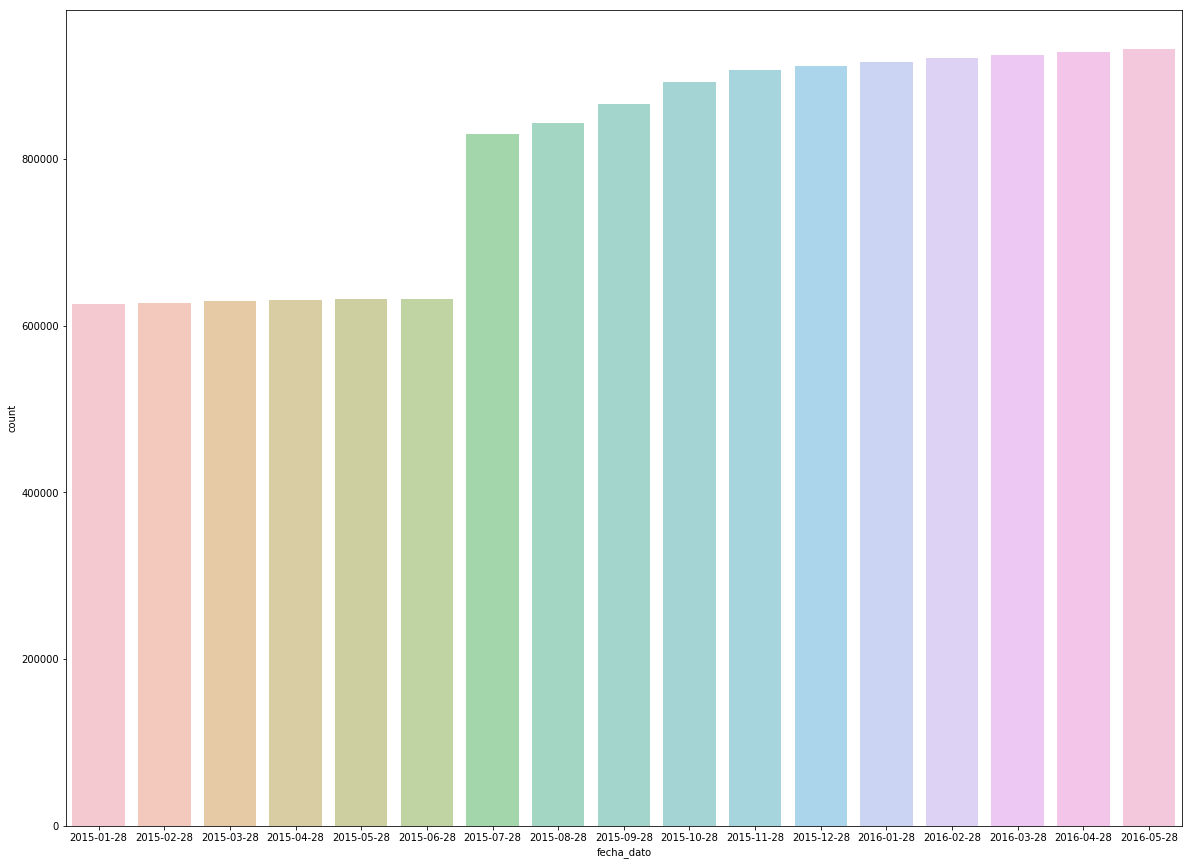

--------------------------------------------------
col :  ind_empleado


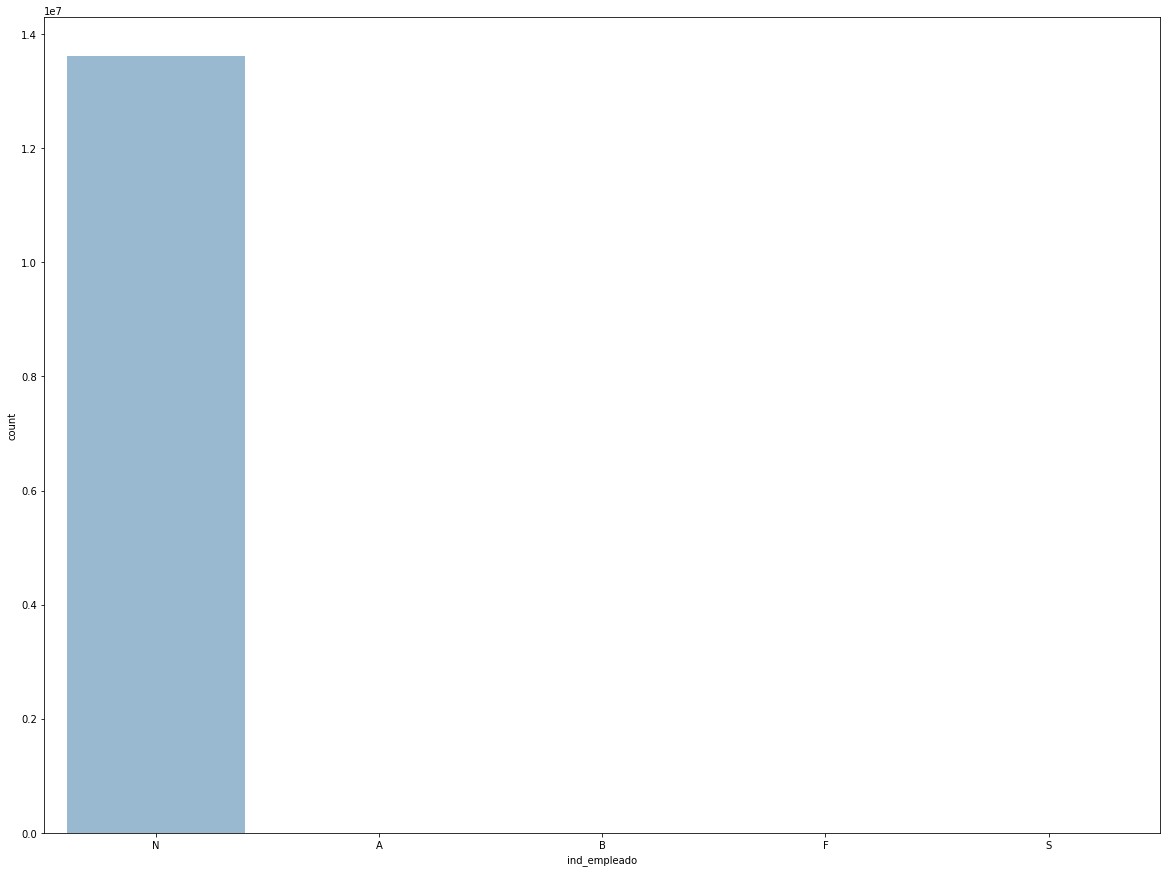

--------------------------------------------------
col :  pais_residencia


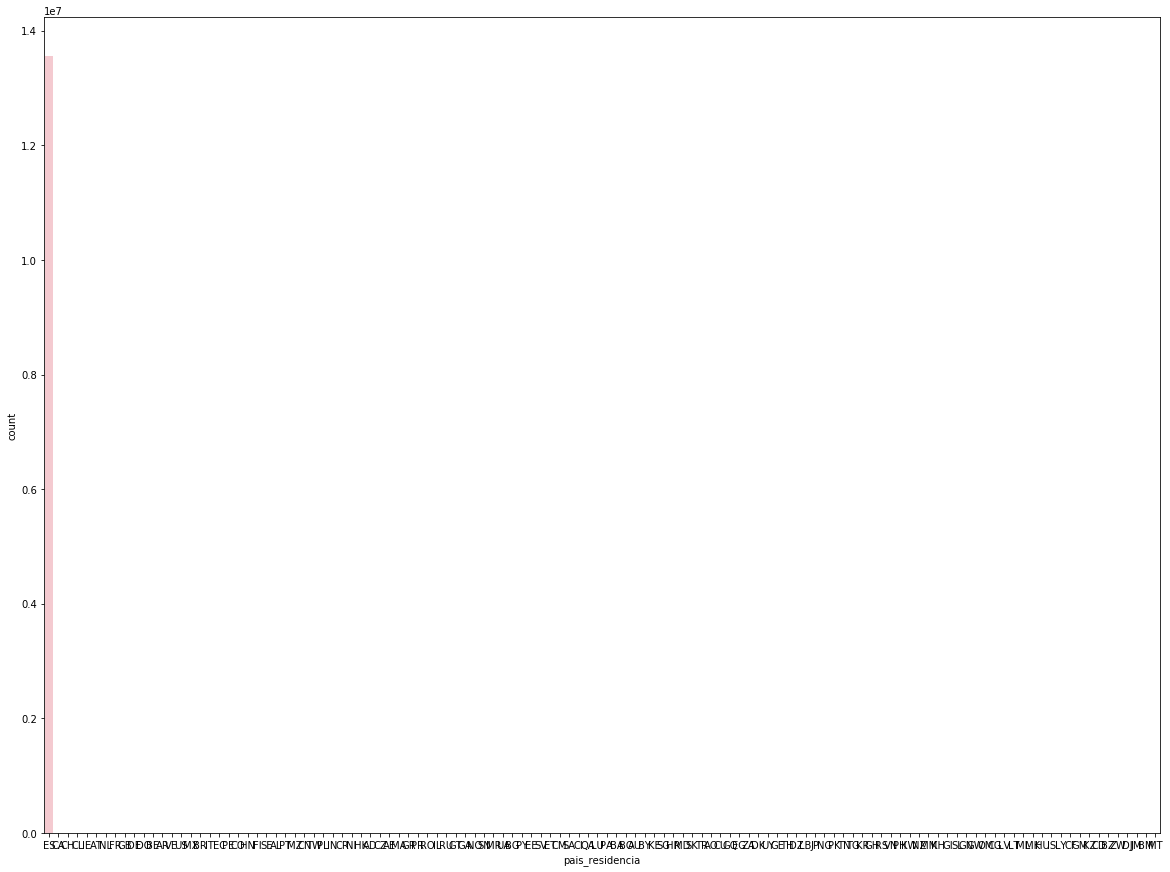

--------------------------------------------------
col :  sexo


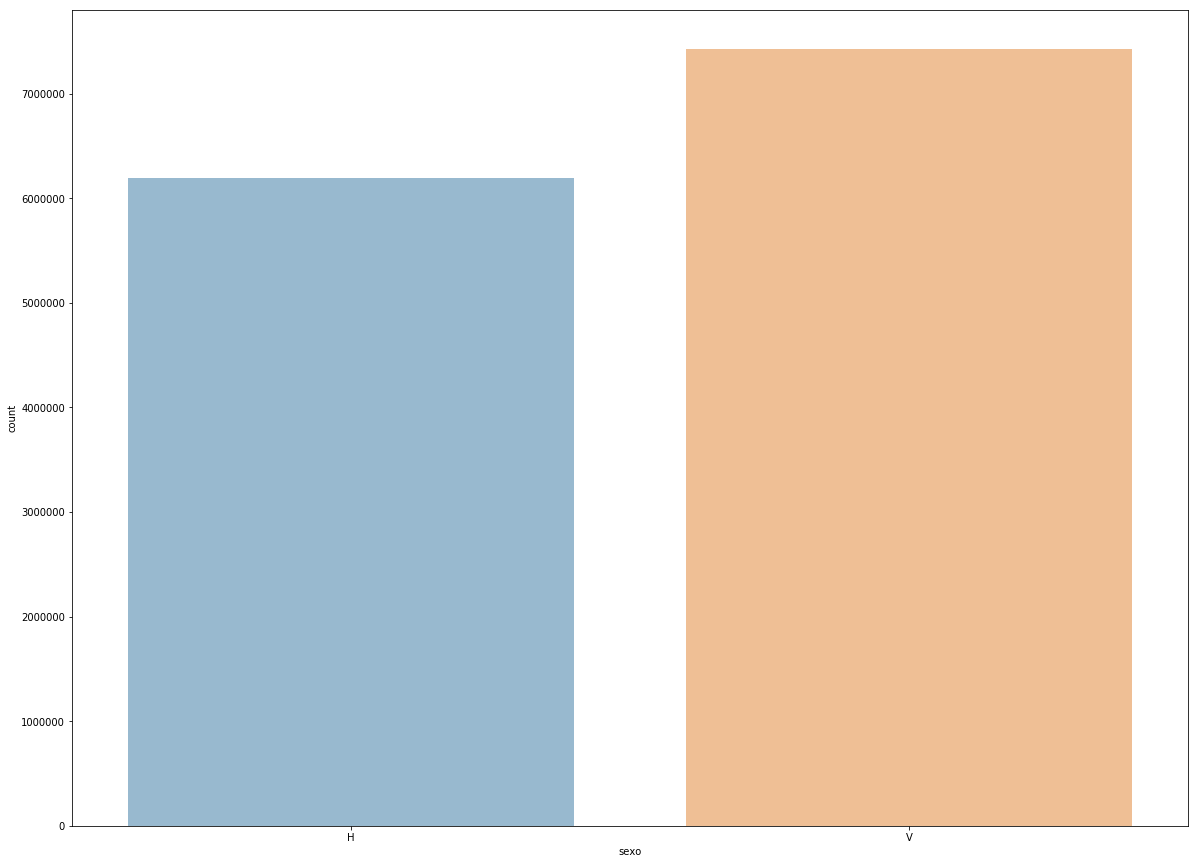

--------------------------------------------------
col :  age


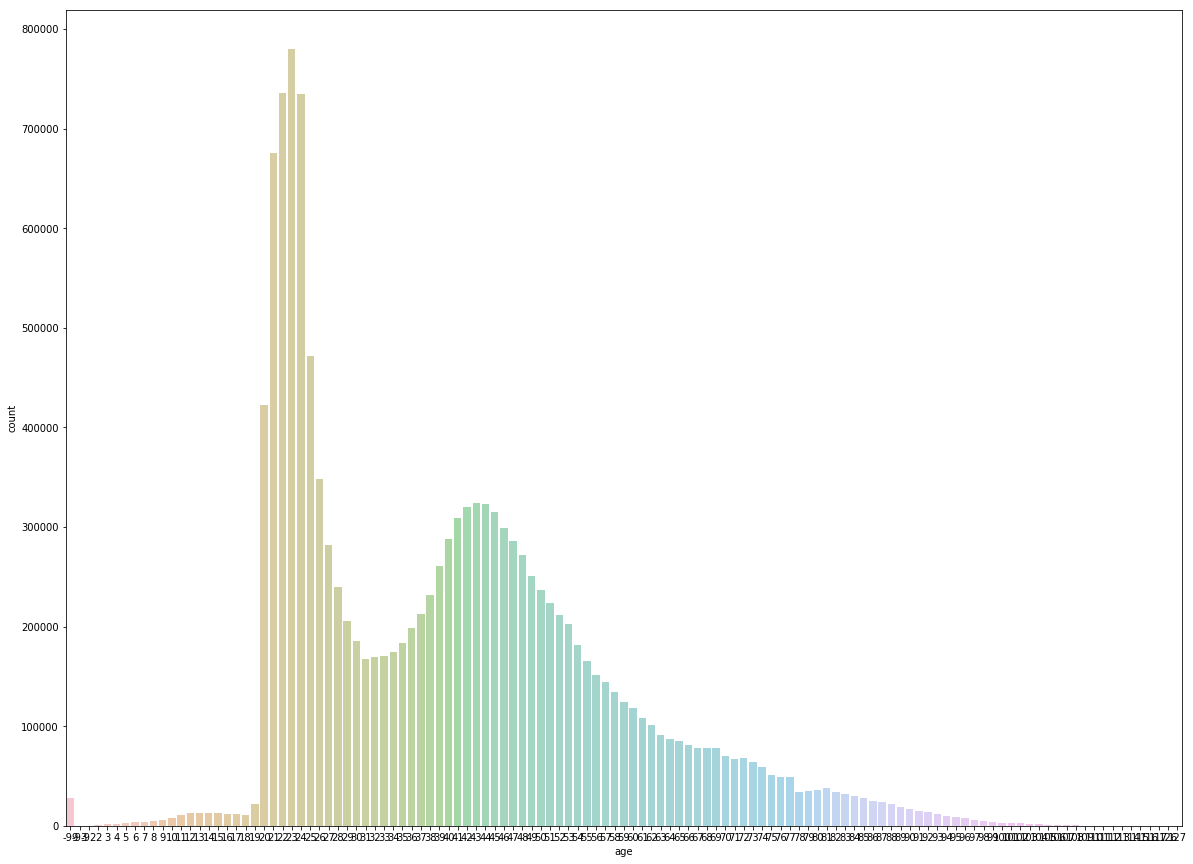

--------------------------------------------------
col :  fecha_alta


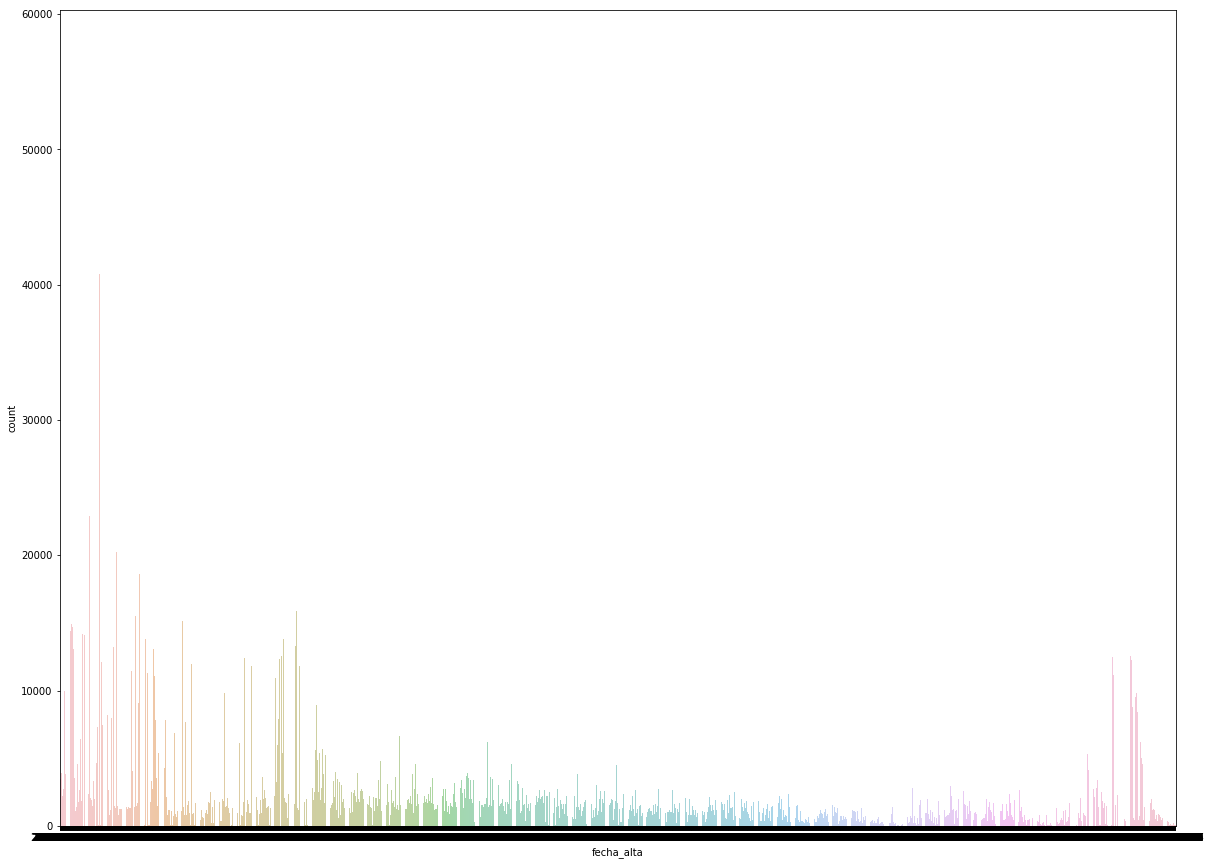

--------------------------------------------------
col :  ind_nuevo


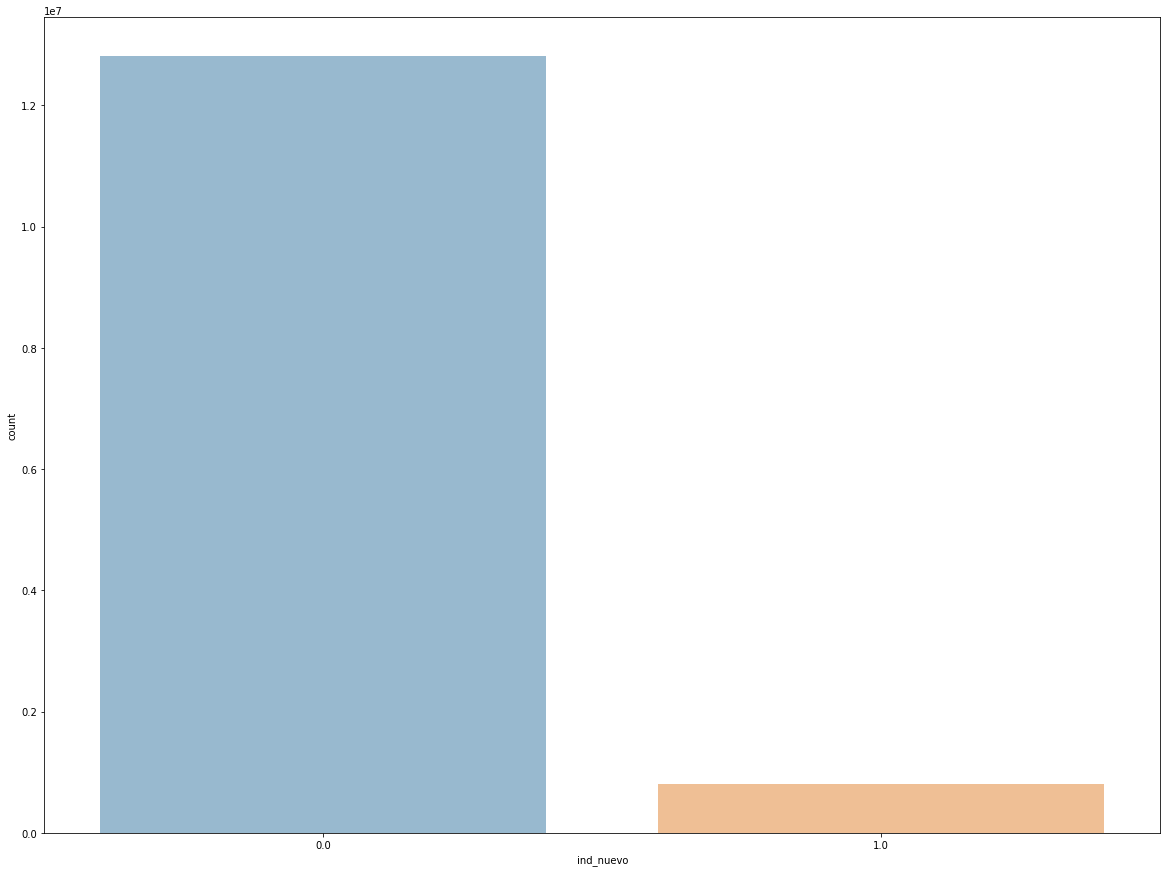

--------------------------------------------------
col :  antiguedad


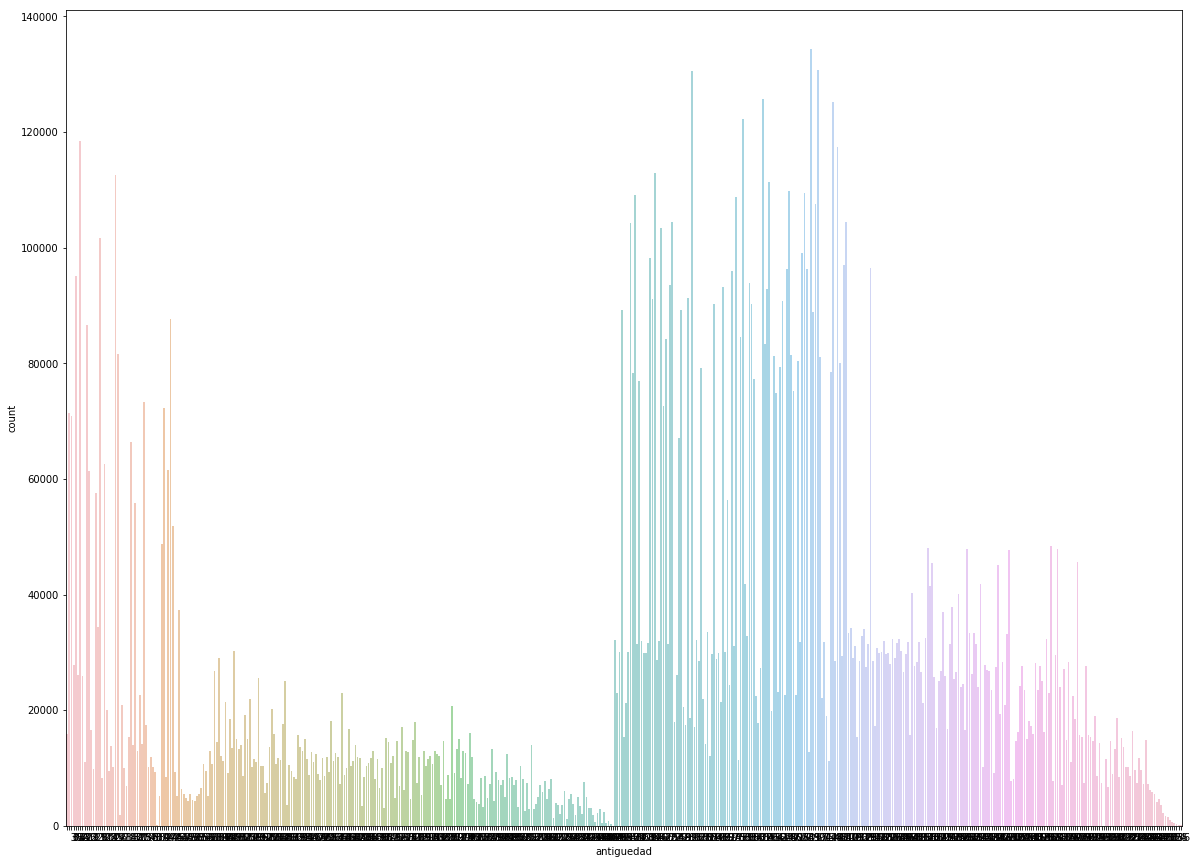

--------------------------------------------------
col :  indrel


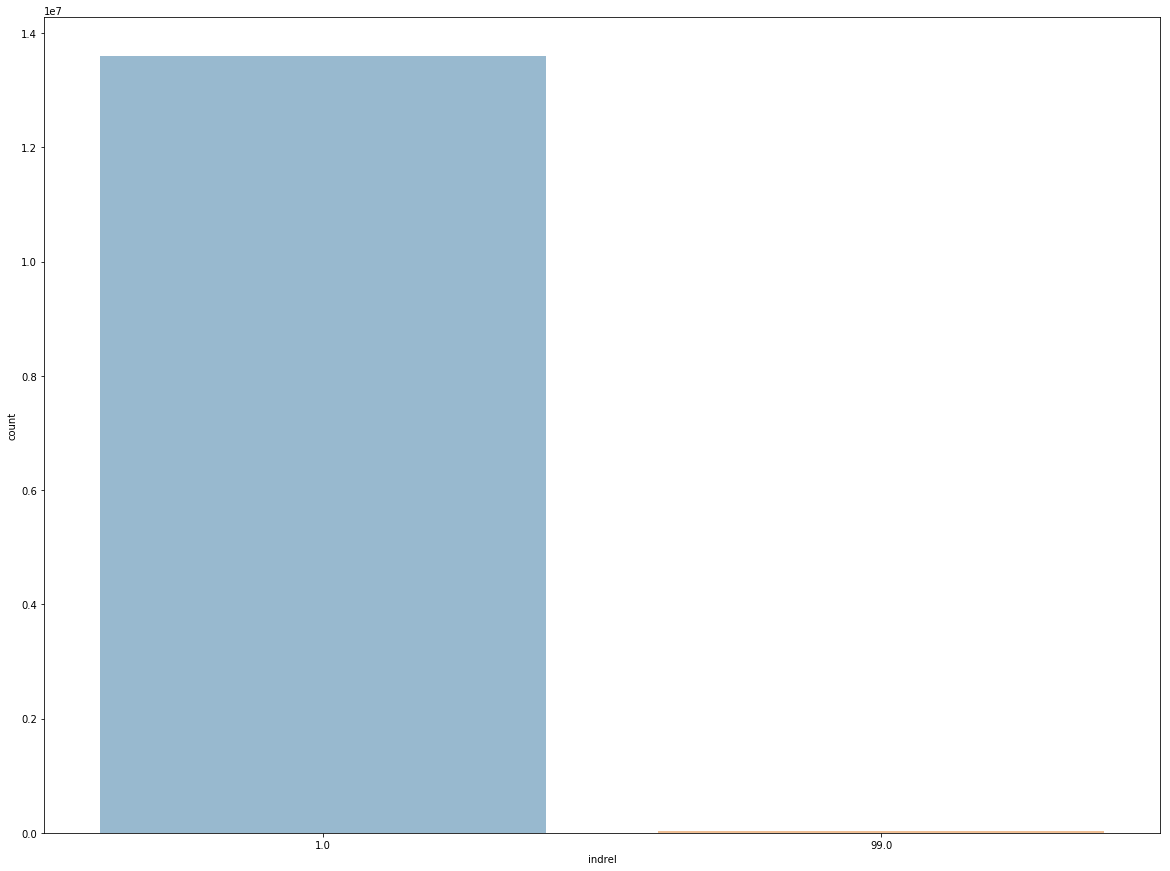

--------------------------------------------------
col :  ult_fec_cli_1t


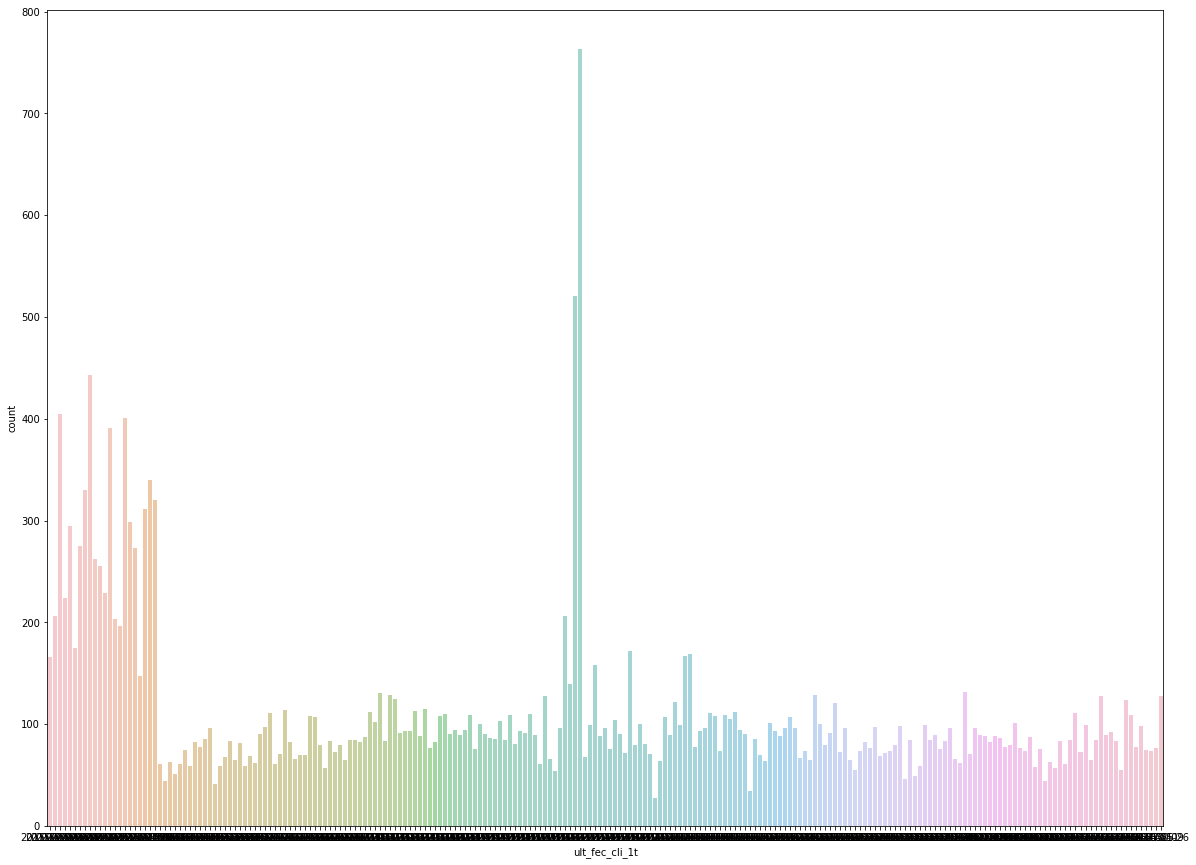

--------------------------------------------------
col :  indrel_1mes


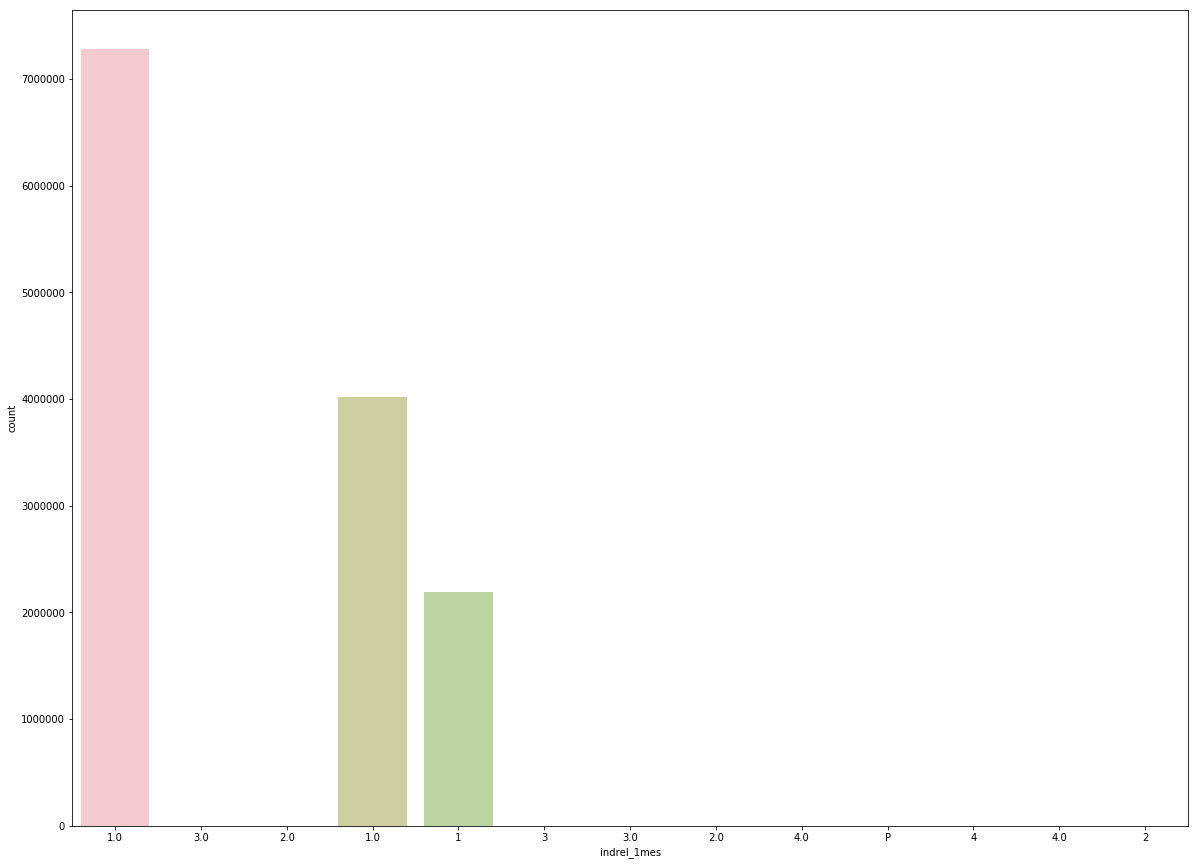

--------------------------------------------------
col :  tiprel_1mes


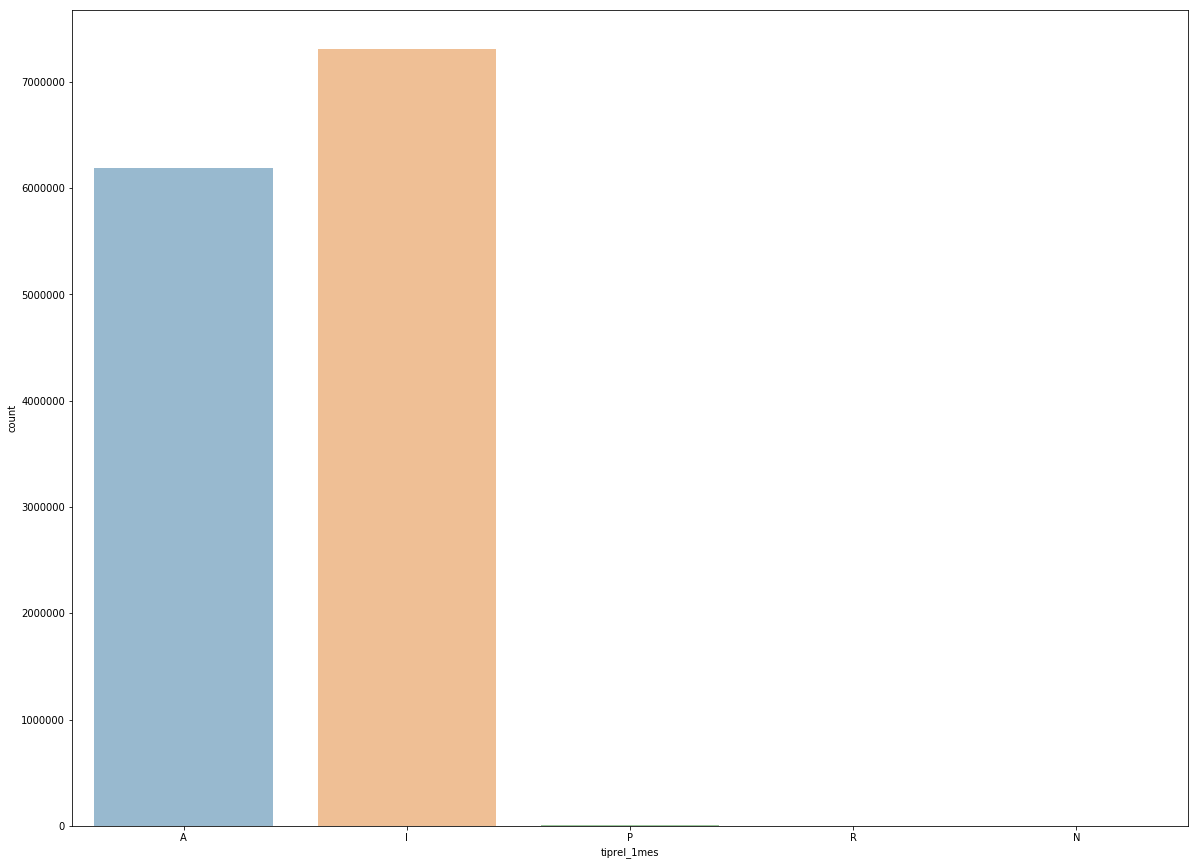

--------------------------------------------------
col :  indresi


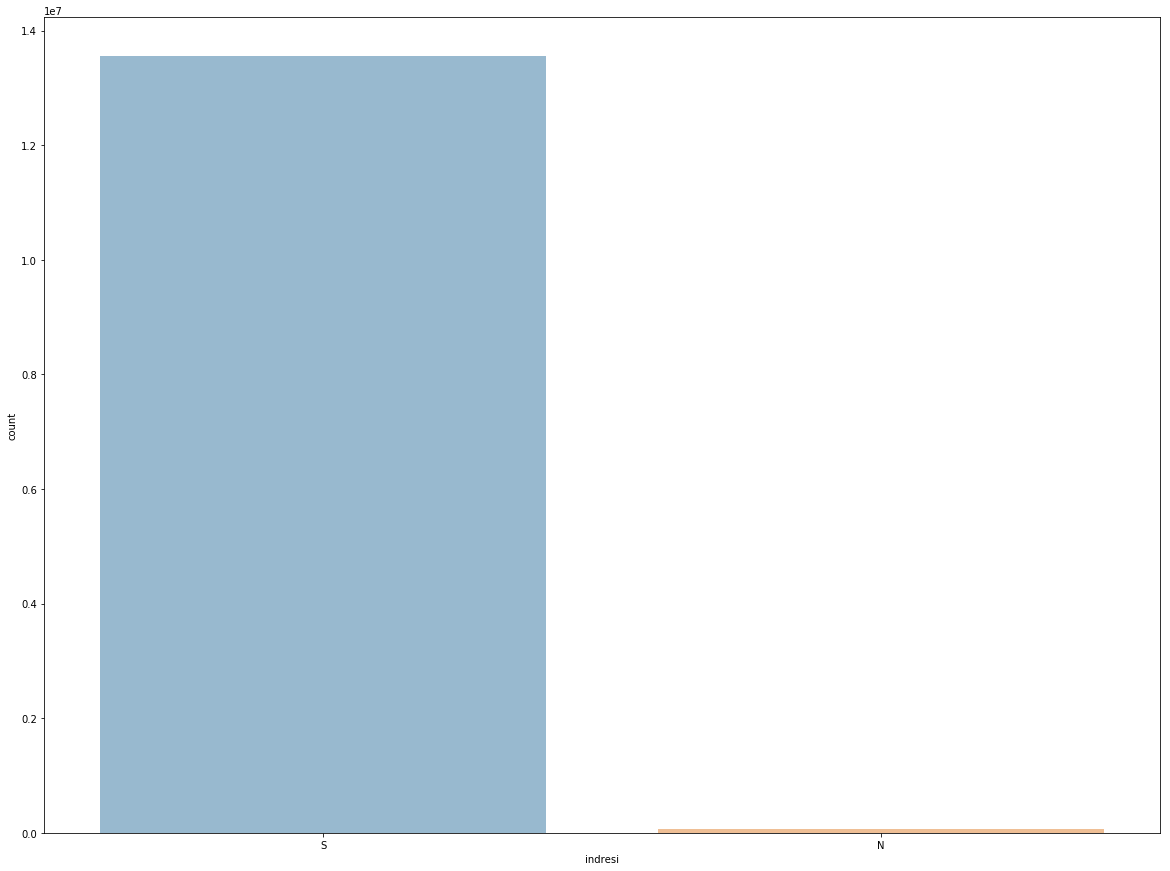

--------------------------------------------------
col :  indext


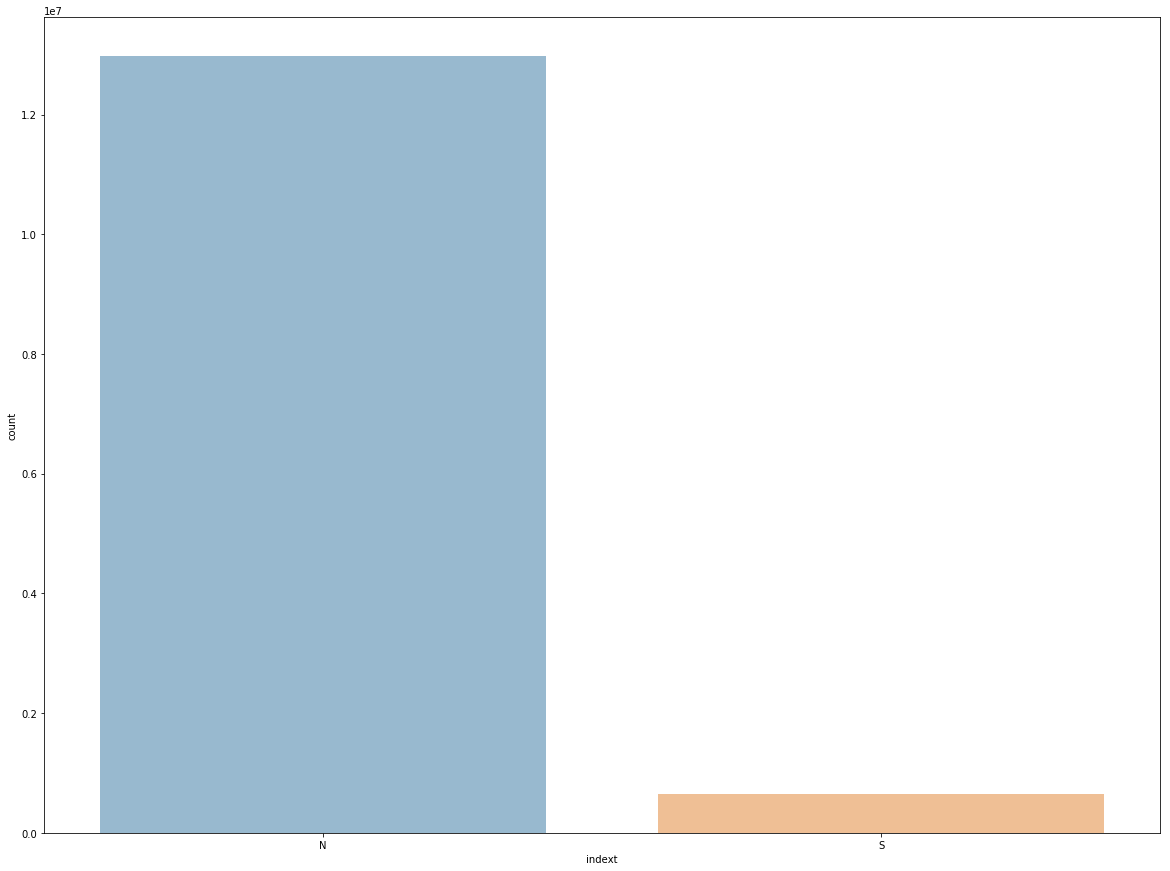

--------------------------------------------------
col :  conyuemp


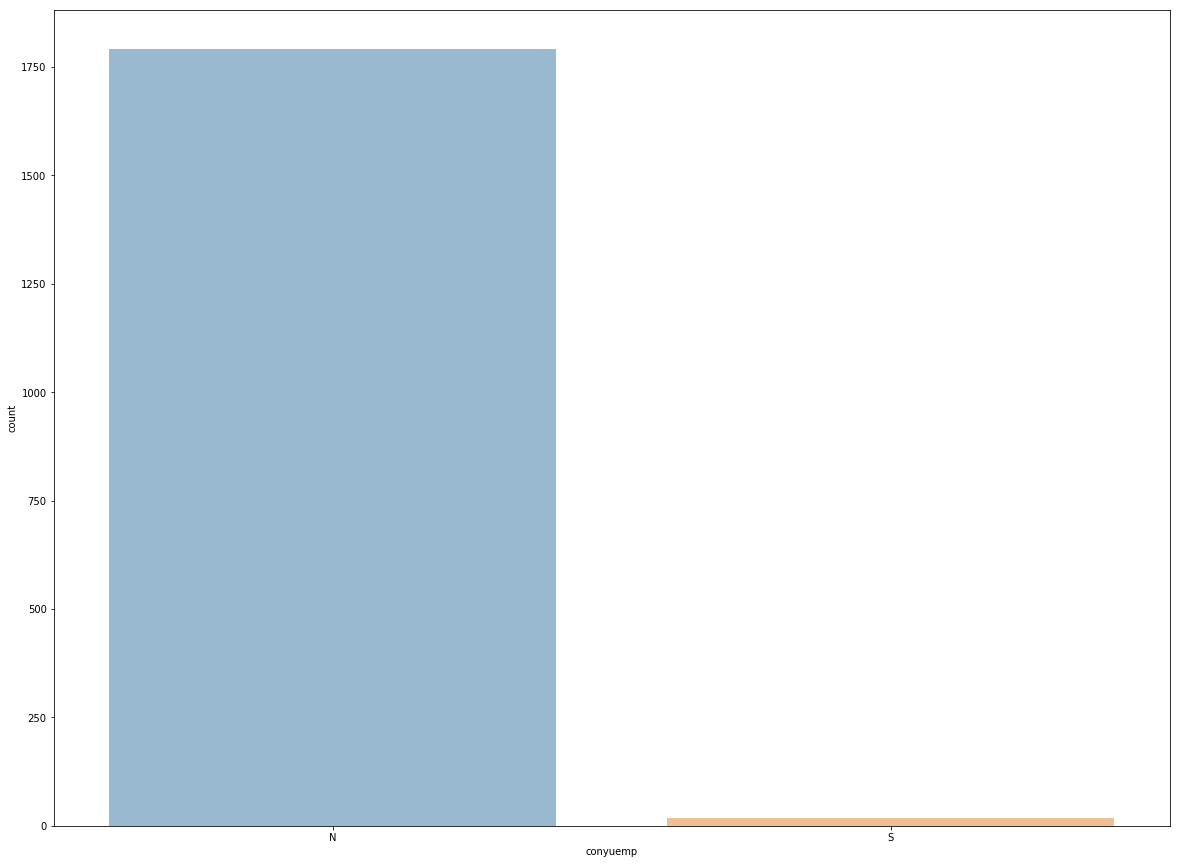

--------------------------------------------------
col :  canal_entrada


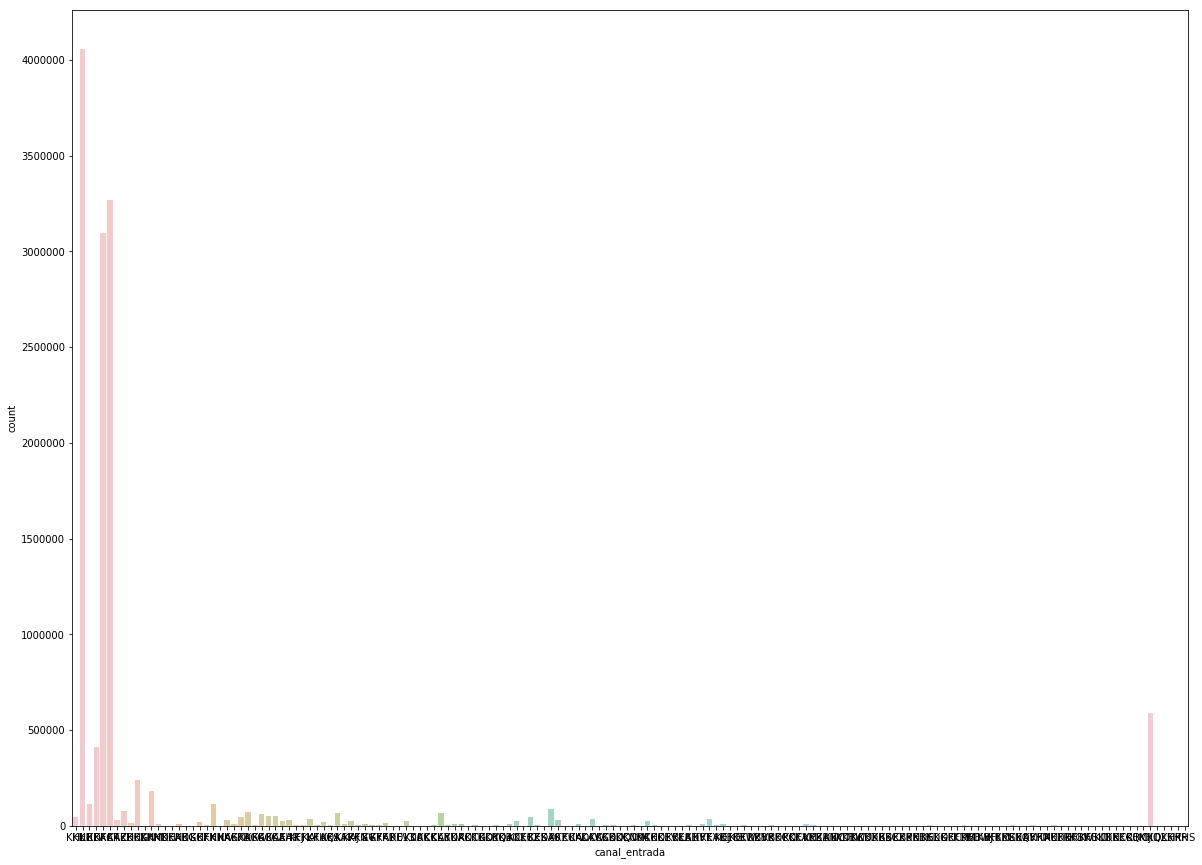

--------------------------------------------------
col :  indfall


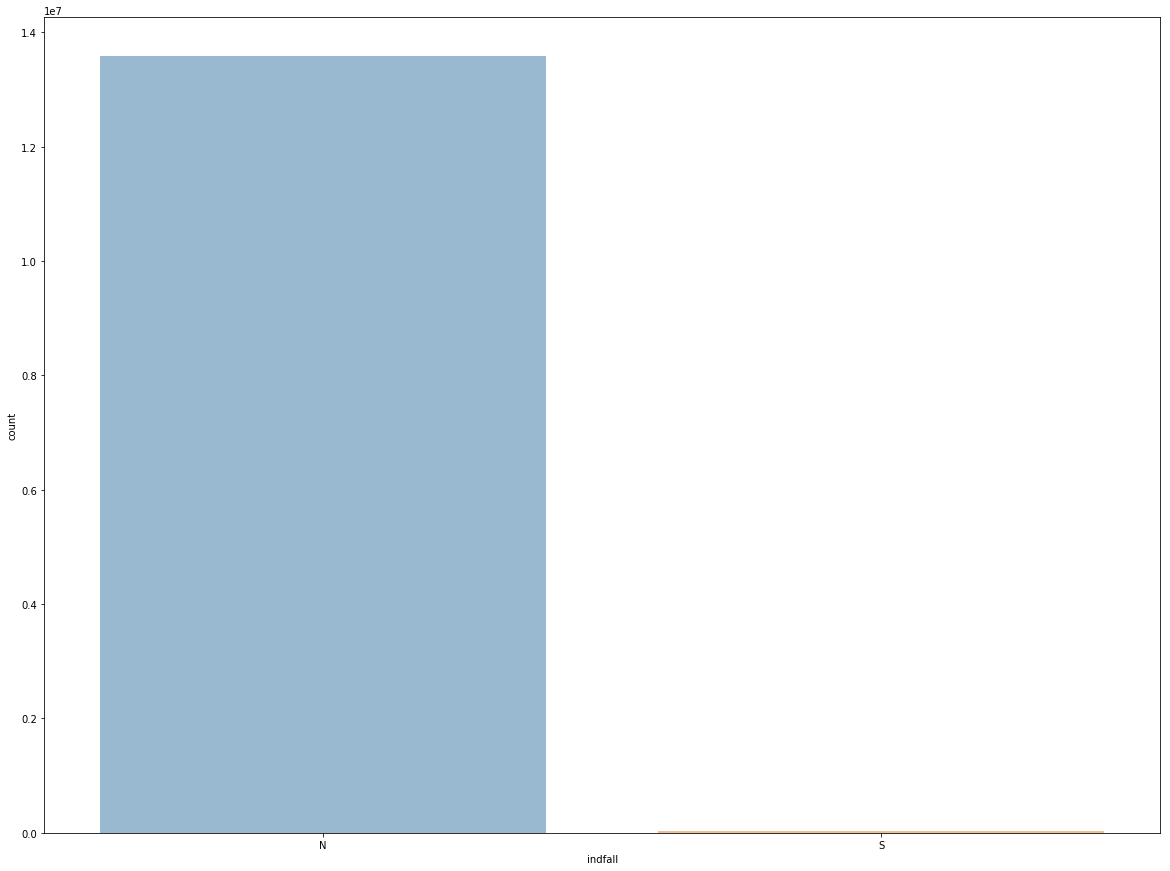

--------------------------------------------------
col :  tipodom


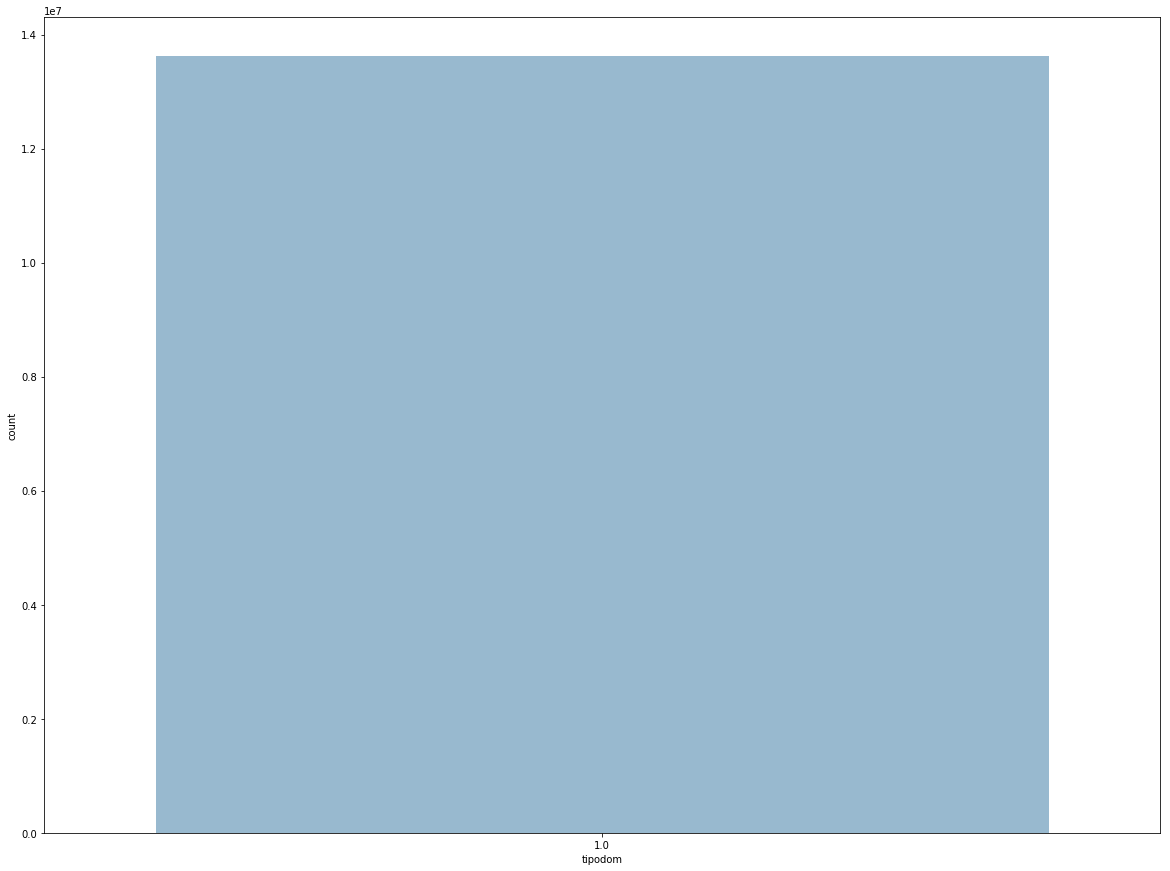

--------------------------------------------------
col :  cod_prov


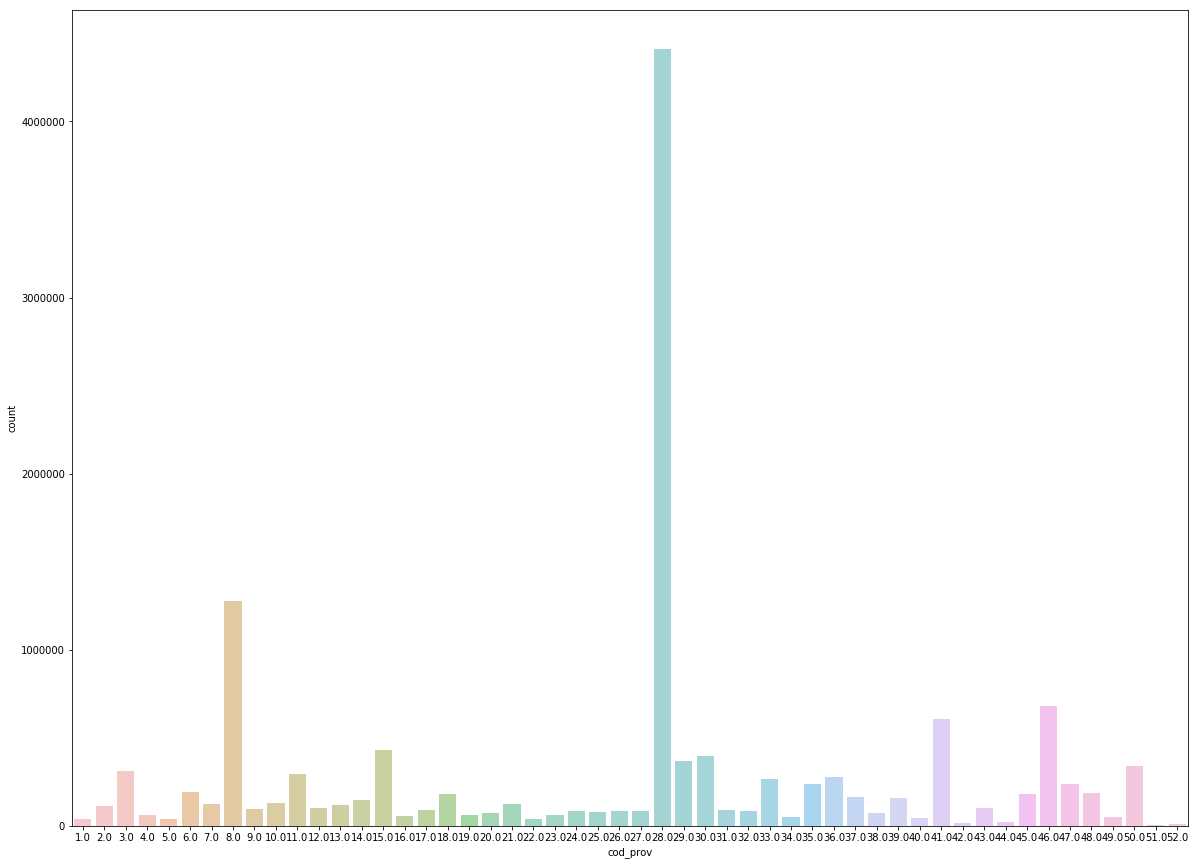

--------------------------------------------------
col :  nomprov


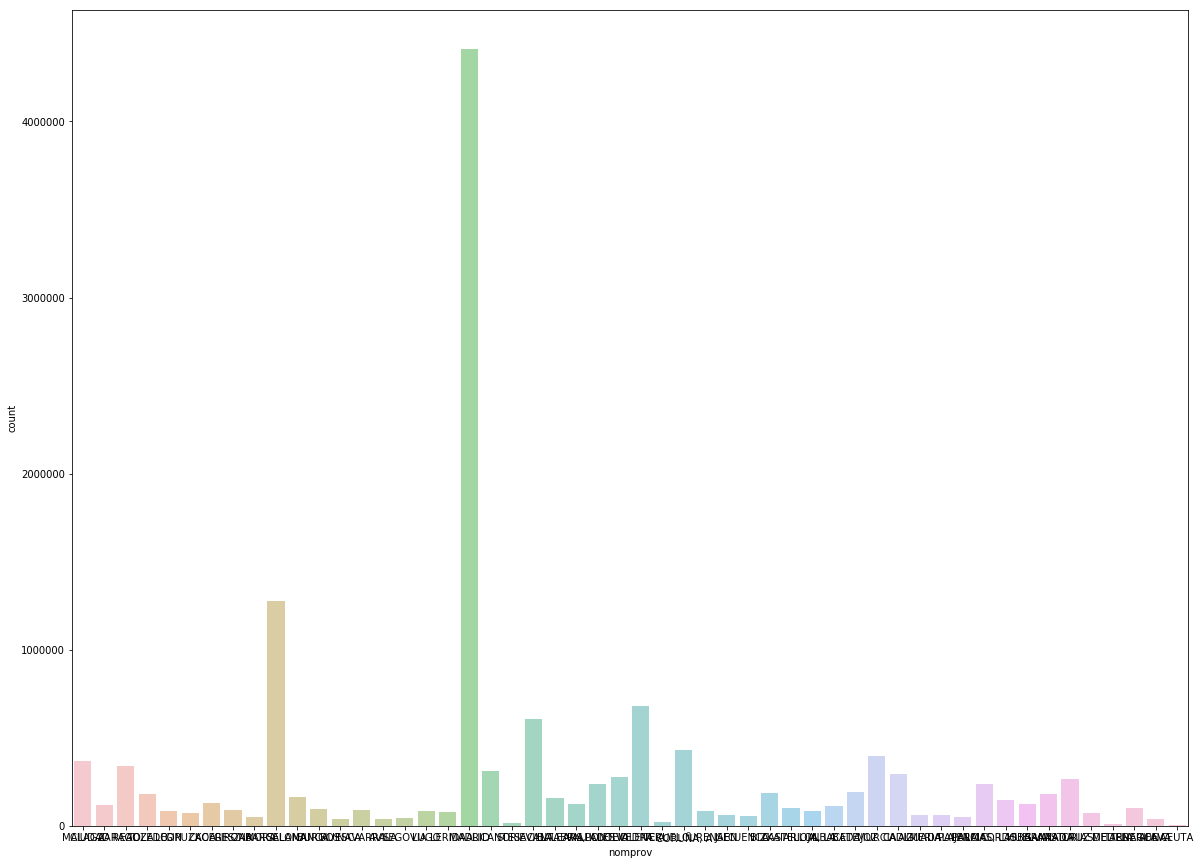

--------------------------------------------------
col :  ind_actividad_cliente


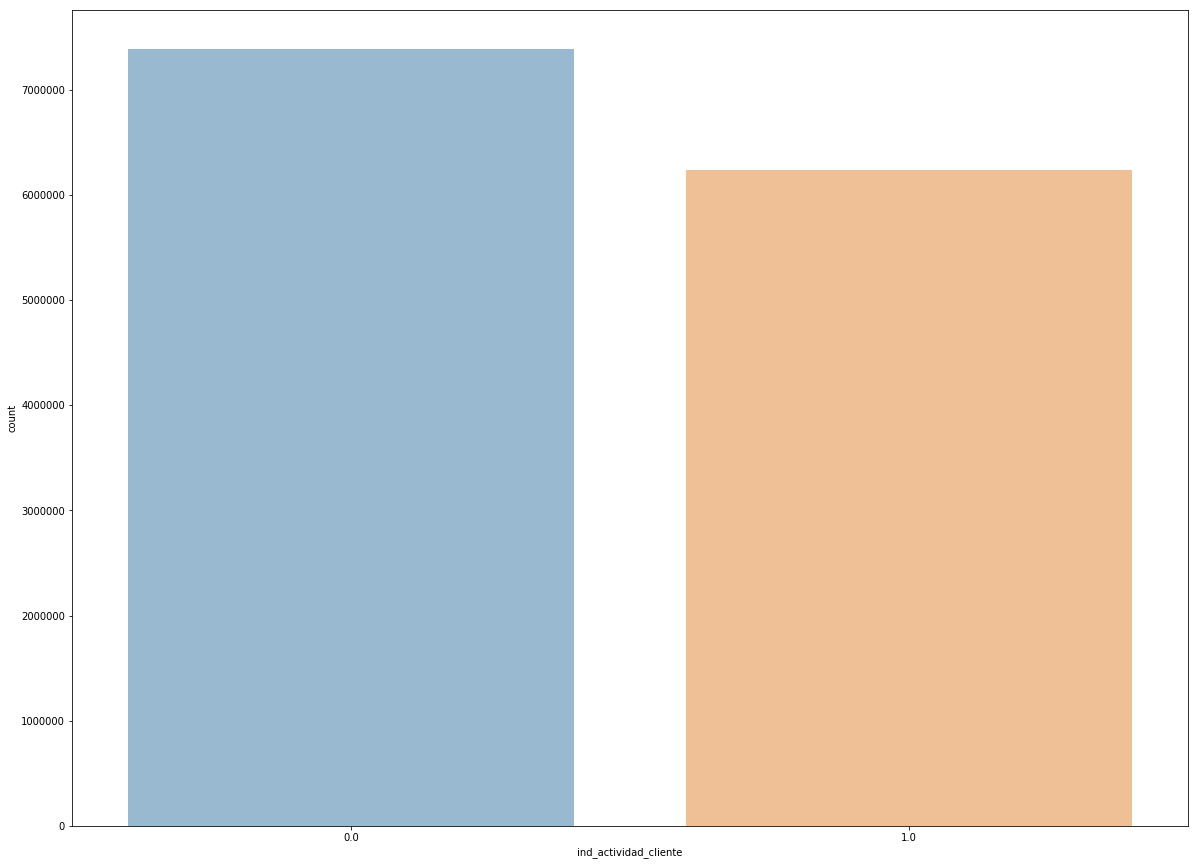

--------------------------------------------------
col :  segmento


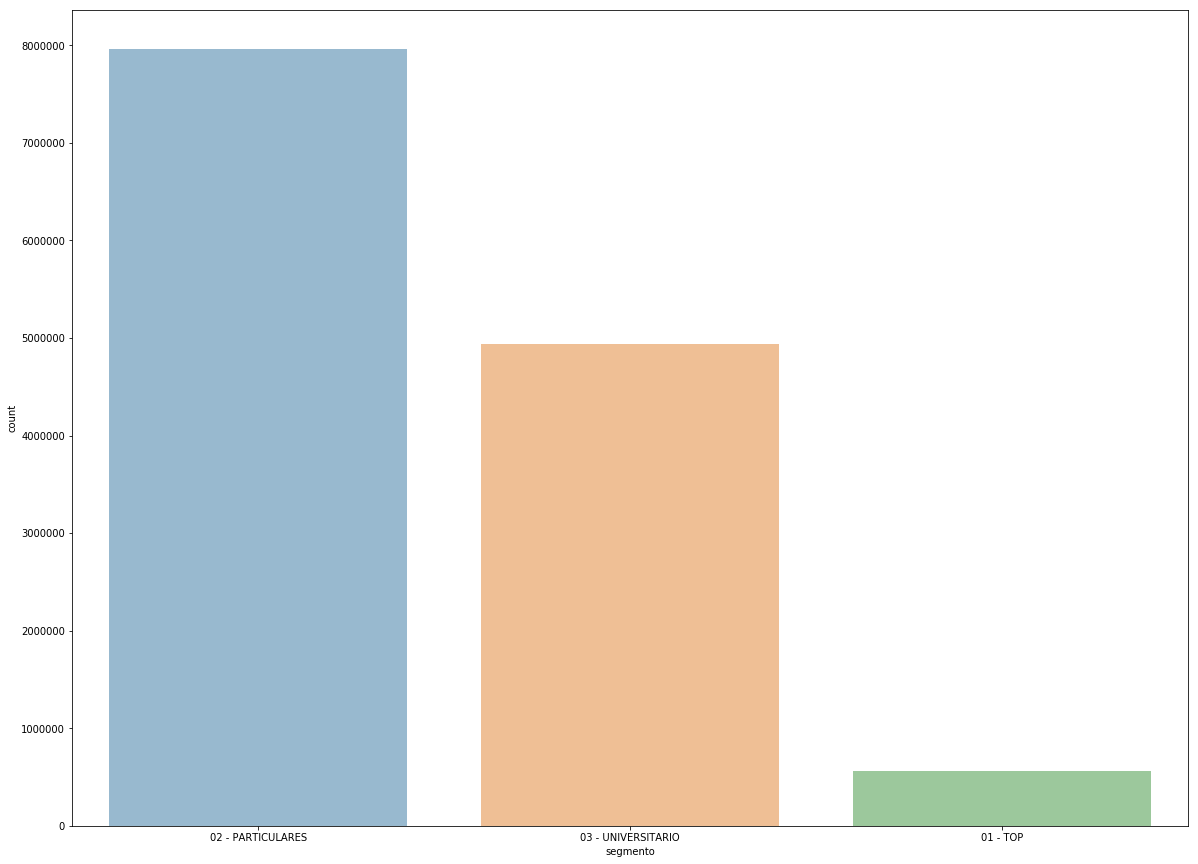

In [23]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns[:24]: # product 변수는 0 or 1인데 이미 위에서 비율을 살펴봤으니 시각화는 생략
    if col in skip_cols:
        continue
        
    print('-' * 50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(20,15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

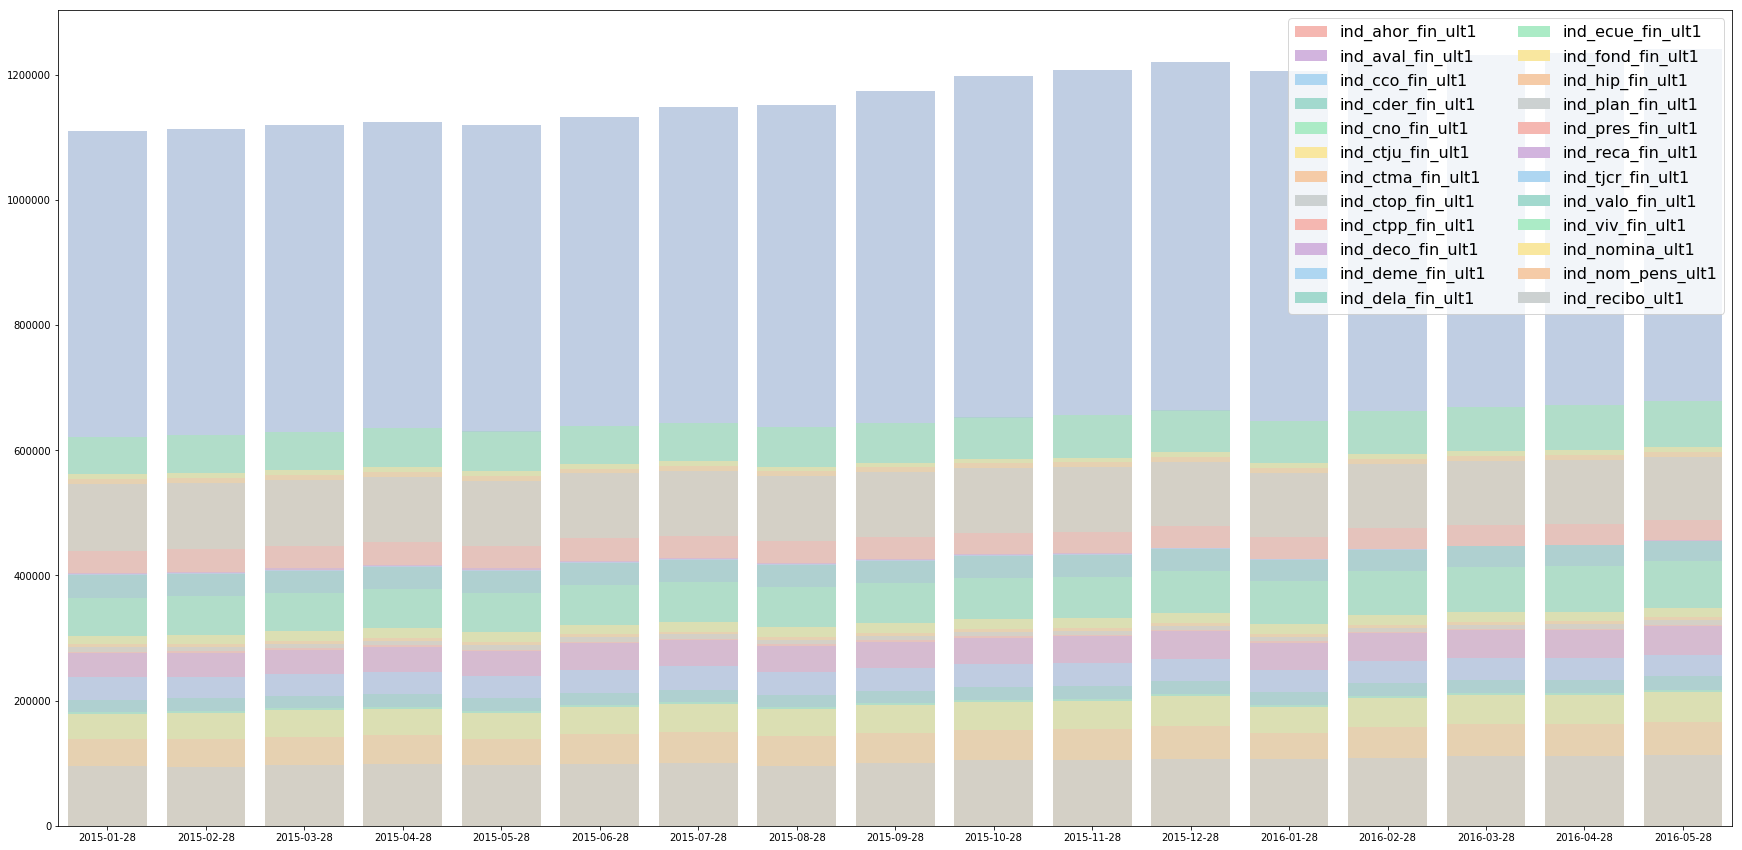

In [24]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터를 별도로 추출하자.
month = trn['fecha_dato'].unique().tolist()
# 제품 변수 24개를 추출하자.
label_cols = trn.columns[24:].tolist()

label_over_time = []

for i in range(len(label_cols)):
    # 매월 각 제품의 총합을 groupb(..).agg('sum')으로 계산하여 label_sum에 저장
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []

for i in range(len(label_cols)):
    # 누적 막대 그래프 생성을 위해, n번째 제품의 총합은 1 ~ n 번째 제품의 총합으로 만든다.
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=month, y=label_sum_over_time[i], alpha=0.7, color = color_list[i%8])
    
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8] , edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

In [25]:
label_sum_over_time_df = pd.DataFrame(label_sum_over_time)

label_sum_over_time_df.index = [label_cols]
label_sum_over_time_df.columns = [month]

label_sum_over_time_df

,2015-01-28,2015-02-28,2015-03-28,2015-04-28,2015-05-28,2015-06-28,2015-07-28,2015-08-28,2015-09-28,2015-10-28,2015-11-28,2015-12-28,2016-01-28,2016-02-28,2016-03-28,2016-04-28,2016-05-28
ind_ahor_fin_ult1,1109367.0,1112733.0,1118829.0,1124795.0,1119858.0,1132501.0,1147960.0,1151798.0,1173705.0,1198063.0,1207748.0,1220647.0,1206284.0,1222968.0,1230966.0,1233896.0,1240538.0
ind_aval_fin_ult1,1109279.0,1112644.0,1118740.0,1124708.0,1119773.0,1132418.0,1147878.0,1151716.0,1173624.0,1197982.0,1207667.0,1220568.0,1206206.0,1222890.0,1230888.0,1233819.0,1240460.0
ind_cco_fin_ult1,1109260.0,1112624.0,1118719.0,1124687.0,1119752.0,1132397.0,1147859.0,1151697.0,1173605.0,1197964.0,1207649.0,1220550.0,1206188.0,1222874.0,1230872.0,1233803.0,1240444.0
ind_cder_fin_ult1,621405.0,623966.0,629645.0,635618.0,630015.0,638370.0,643956.0,636870.0,643997.0,652448.0,655848.0,663500.0,646607.0,662860.0,669426.0,671996.0,678829.0
ind_cno_fin_ult1,621104.0,623665.0,629330.0,635305.0,629702.0,638054.0,643636.0,636547.0,643678.0,652131.0,655529.0,663181.0,646284.0,662532.0,669107.0,671682.0,678513.0
ind_ctju_fin_ult1,562341.0,563637.0,568401.0,573084.0,566311.0,578209.0,582029.0,573550.0,579919.0,586682.0,588147.0,596938.0,578873.0,593896.0,598966.0,599925.0,605452.0
ind_ctma_fin_ult1,554584.0,555947.0,560727.0,565431.0,558664.0,570613.0,574447.0,565994.0,572398.0,579158.0,580641.0,589357.0,571278.0,586284.0,591349.0,592320.0,597871.0
ind_ctop_fin_ult1,546166.0,547719.0,552852.0,557949.0,551568.0,563693.0,567508.0,559001.0,565218.0,571707.0,572802.0,581166.0,563023.0,577873.0,582634.0,583668.0,589774.0
ind_ctpp_fin_ult1,439695.0,441676.0,447164.0,452782.0,446621.0,459091.0,463220.0,454948.0,461538.0,468408.0,469902.0,478586.0,460860.0,476144.0,481257.0,482628.0,489185.0
ind_deco_fin_ult1,403500.0,405636.0,411317.0,417132.0,411122.0,423749.0,428075.0,419938.0,426743.0,433769.0,435473.0,444351.0,426854.0,442343.0,447627.0,449154.0,455914.0


* 이번 대회에서 예측해야하는 값은 **고객이 신규로 구매할 제품**이다.</b>
* 보유여부가 0에서 1로 변하는 그 순간에 관심이 있는 것이지, 구매 후 지속적으로 해당 제품을 보유하고 있는지는 상관없음</b>
* 따라서 **신규구매에 대한 월별 추이**를 반드시 확인해야 함</b></b>

* 아래에서 제품별로 신규구매여부를 추출하기 위한 코드를 살펴보자

In [6]:
# 날짜를 숫자로 변환하는 함수 (2015-01-18 -> 1, 2016-06-28 -> 18)

def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# train 데이터에 날짜를 숫자로 변환한 칼럼을 추가

trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사한 후, lag-1 데이터를 생성한다.
#print('lag 데이터 처리시작')
trn_lag = trn.copy()
#print('카피완료')
trn_lag['int_date'] += 1
#print('lag-1 처리')
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]
#print('컬럼명 변경완료')

In [7]:
# lag 데이터 중 고객정보의 lag는 삭제 (삭제하지 않을 경우 data 크기로 memory가 부족 - RAM 16GB까지 안돌아감..)

tmp = trn_lag.columns[2:24].tolist()

for col in tmp:
    del trn_lag[col]

del tmp

In [8]:
# lag 데이터를 원래 데이터와 합침 (고객번호와 날짜를 기준으로 left join)
print('merge 시작')
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')
print('merge 완료')

# 불필요한 데이터 삭제
print('데이터 삭제시작')
del trn, trn_lag
print('데이터 삭제완료')

merge 시작
merge 완료
데이터 삭제시작
데이터 삭제완료


In [9]:
# 저번 달의 제품 정보가 없을 경우 0으로 대체
for prod in product:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
    
# 원본 데이터와 lag 데이터의 제품보유여부를 비교하여 신규 구매 변수 padd를 추가
for prod in product:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)
    
# 신규 구매 변수를 labels에 저장
add_cols = [prod + '_add' for prod in product]
labels = df_trn[add_cols].copy()
labels.columns = product
#labels.to_csv("labels.csv", index = False)

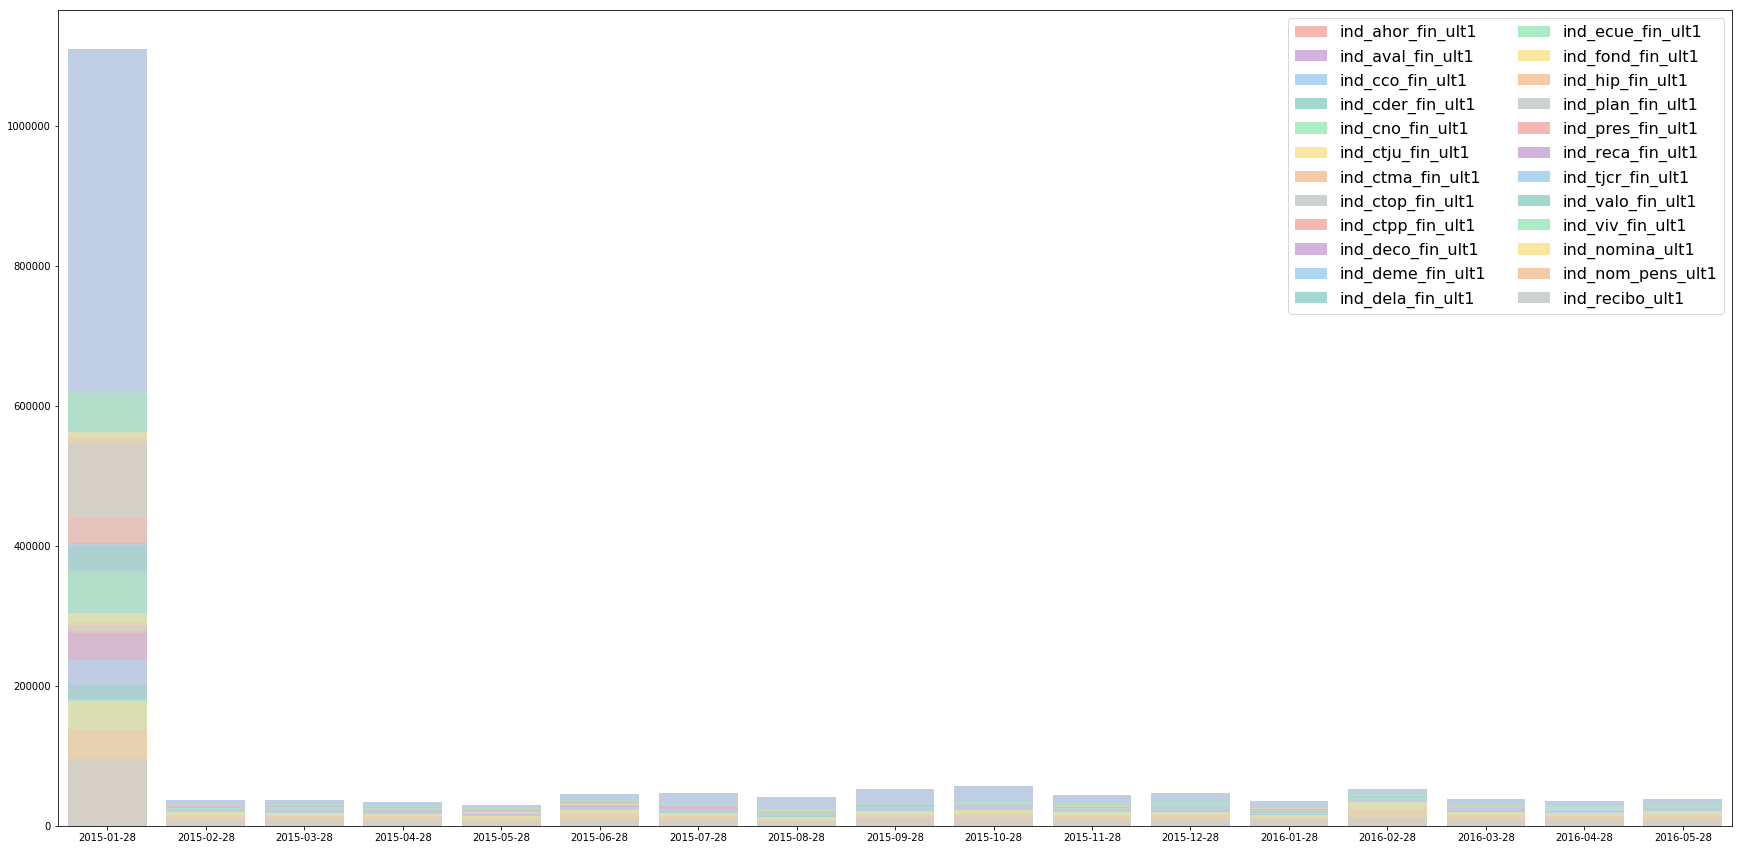

In [10]:
fecha_dato = df_trn['fecha_dato']
labels['date'] = fecha_dato
months = np.unique(fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

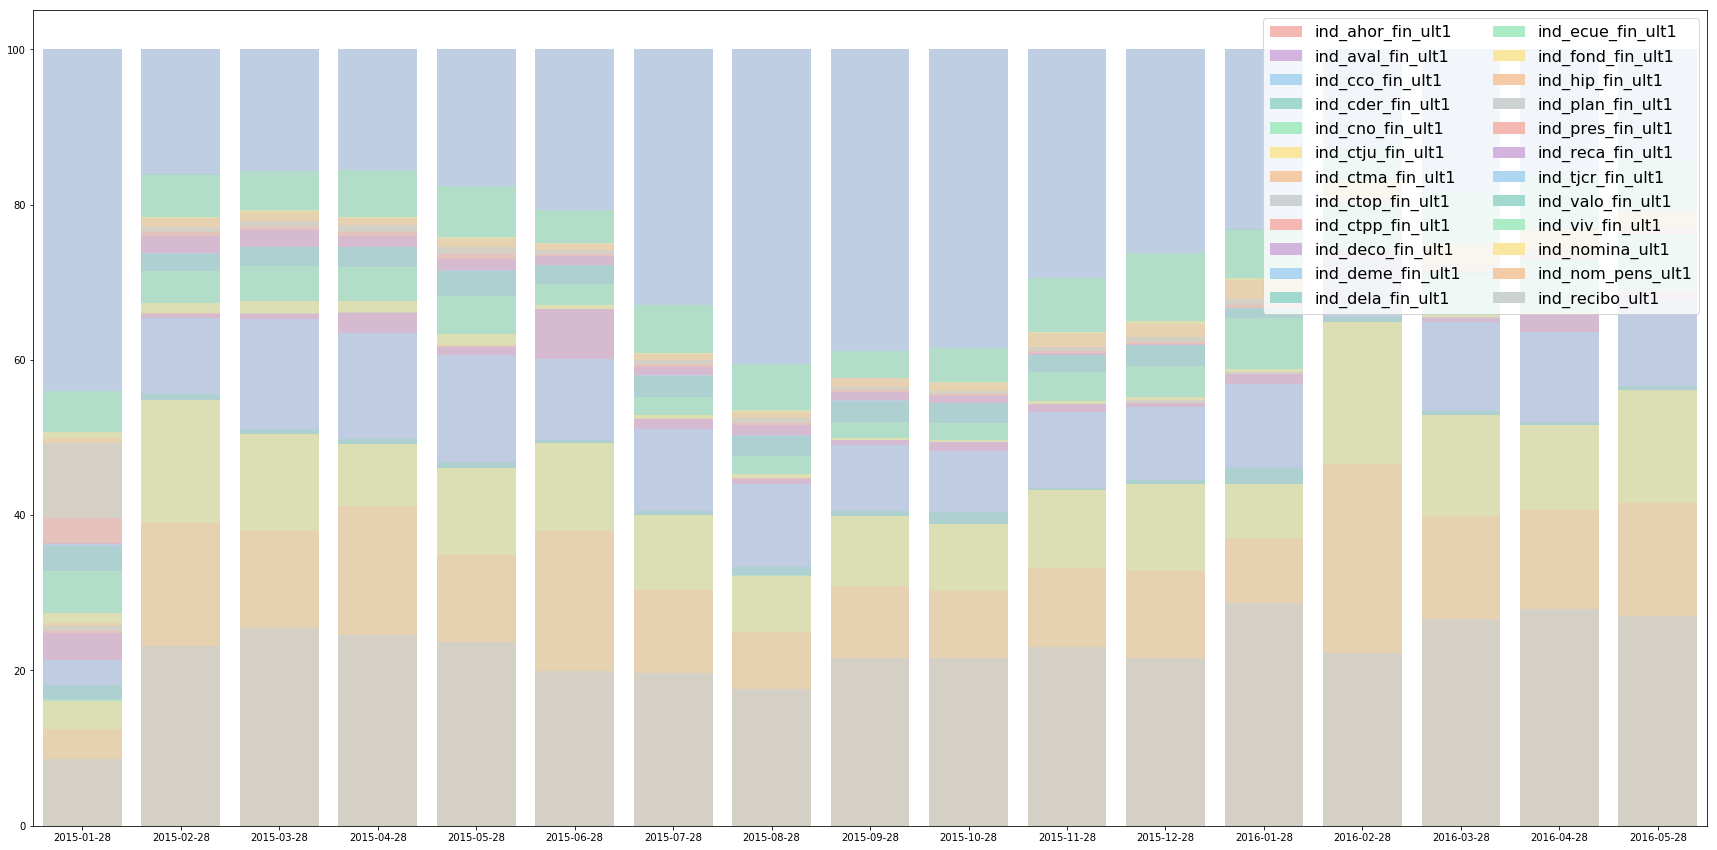

In [11]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})